In [22]:
import math 
import random
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

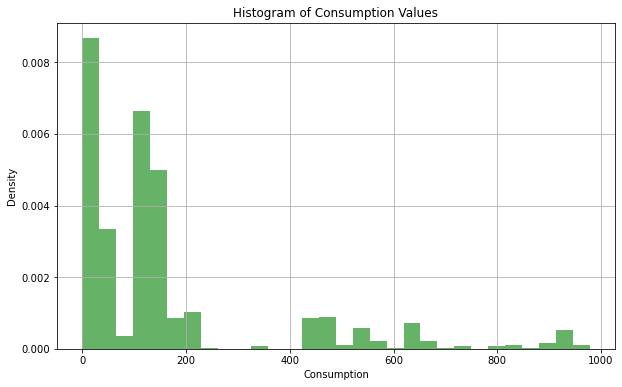

In [26]:
df_merged = pd.read_csv('Merged.csv')
plt.figure(figsize=(10, 6))
df_merged['Consumption'].hist(bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.title('Histogram of Consumption Values')
plt.grid(True)
plt.show()

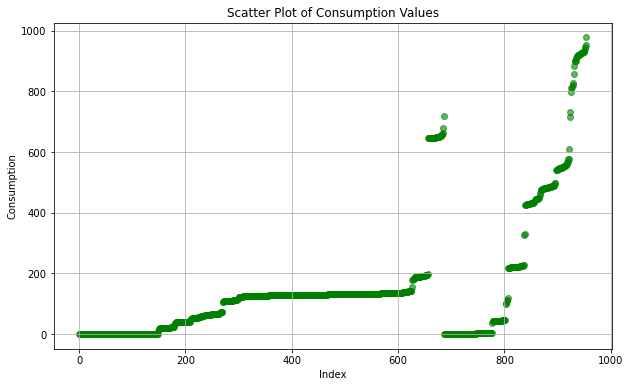

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_merged)), df_merged['Consumption'], alpha=0.6, color='g')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Scatter Plot of Consumption Values')
plt.grid(True)
plt.show()

In [23]:
df_clean = pd.read_csv('Clean.csv')
df_clean.dtypes

Test                object
PKG                float64
CPU                float64
Time               float64
Code                object
Code_Type            int64
Compiler            object
Compiler_Type        int64
Time_comp           object
Time_comp_cat      float64
Space_comp          object
Space_comp_cat       int64
Nested_loops       float64
Simple_cond        float64
Complex_cond       float64
Recursion_calls    float64
Source_LOC         float64
NR_functions       float64
NR_param           float64
cyc_comp           float64
Consumption        float64
Energy_label        object
dtype: object

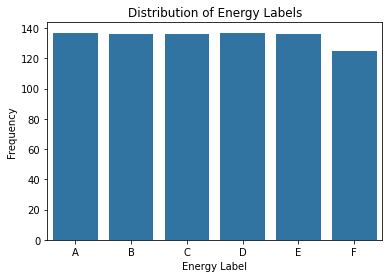

In [24]:
# Histogram with KDE for each category
sns.countplot(data=df_clean, x='Energy_label', order=df_clean['Energy_label'])

# Set titles and labels
plt.title('Distribution of Energy Labels')
plt.xlabel('Energy Label')
plt.ylabel('Frequency')

# Show the plot
plt.show()

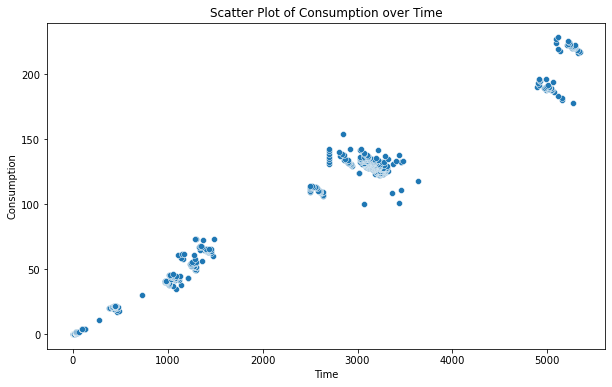

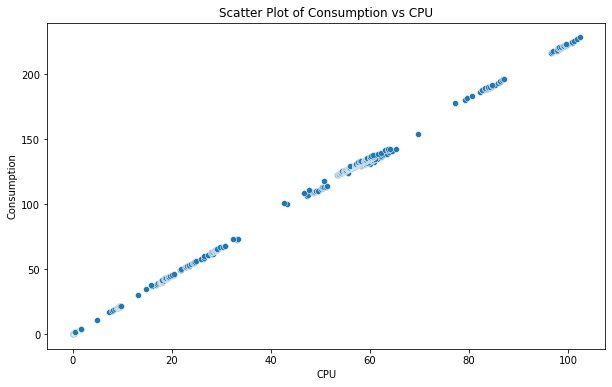

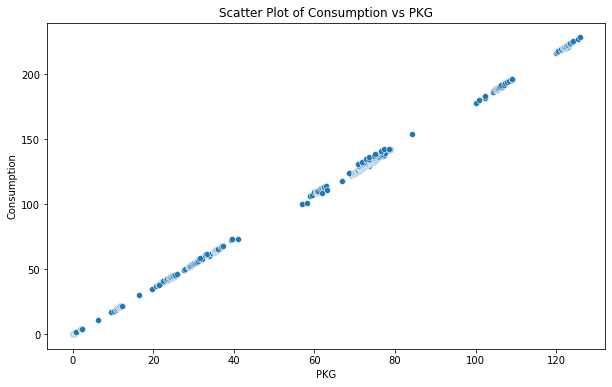

In [25]:
# Drop any rows with NaN values in these columns
df_clean = df_clean.dropna(subset=['PKG', 'CPU', 'Consumption'])

# Example: Scatter plot of Consumption vs Time (assuming you have a 'Time' column)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Time', y='Consumption')
plt.title('Scatter Plot of Consumption over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()

# Example: Scatter plot of Consumption vs CPU
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='CPU', y='Consumption')
plt.title('Scatter Plot of Consumption vs CPU')
plt.xlabel('CPU')
plt.ylabel('Consumption')
plt.show()

# Example: Scatter plot of Consumption vs PKG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='PKG', y='Consumption')
plt.title('Scatter Plot of Consumption vs PKG')
plt.xlabel('PKG')
plt.ylabel('Consumption')
plt.show()

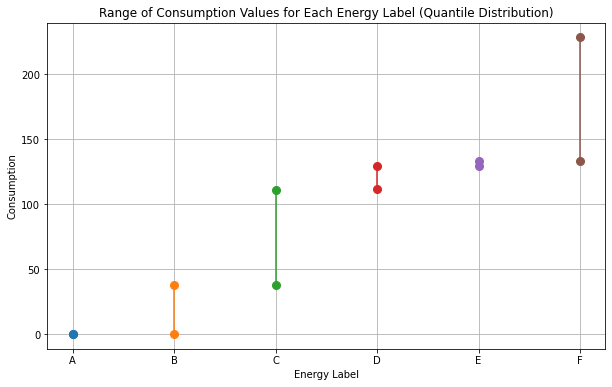

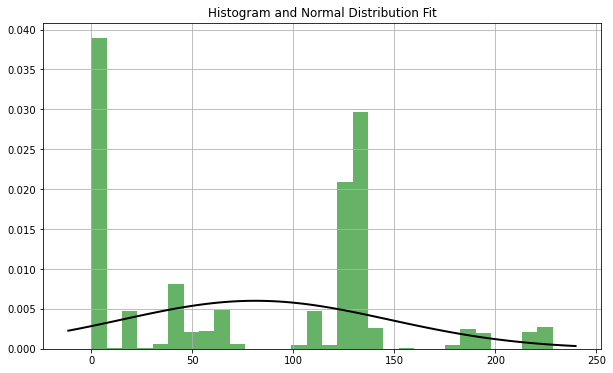

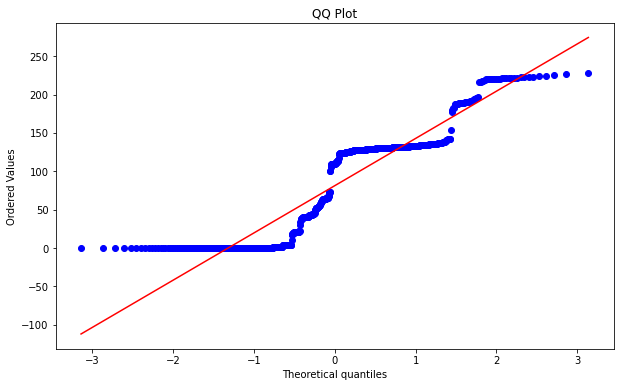

In [21]:
# Calculate the range of consumption values for each label
consumption_ranges = df_clean.groupby('Energy_label')['Consumption'].agg(['min', 'max']).reset_index()

# Plotting the ranges
plt.figure(figsize=(10, 6))
for i, label in enumerate(consumption_ranges['Energy_label']):
    plt.plot([label, label], 
             [consumption_ranges.loc[i, 'min'], consumption_ranges.loc[i, 'max']],
             marker='o', markersize=8)

plt.xlabel('Energy Label')
plt.ylabel('Consumption')
plt.title('Range of Consumption Values for Each Energy Label (Quantile Distribution)')
plt.grid(True)
plt.show()

# Verify the fit visually using a histogram
plt.figure(figsize=(10, 6))
df_clean['Consumption'].hist(bins=30, density=True, alpha=0.6, color='g')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df_clean['Consumption'].mean(), df_clean['Consumption'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histogram and Normal Distribution Fit")
plt.show()

# QQ plot to verify normality
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(df_clean['Consumption'], dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

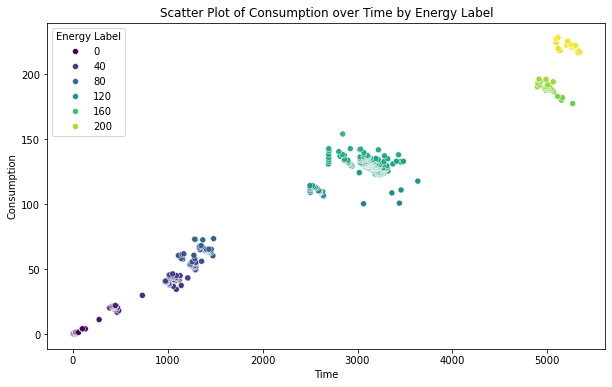

In [29]:
# Example: Scatter plot of Consumption vs Time with Energy_label_code as hue (assuming you have a 'Time' column)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Time', y='Consumption', hue='Consumption', palette='viridis')
plt.title('Scatter Plot of Consumption over Time by Energy Label')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend(title='Energy Label')
plt.show()
